No sentence-transformers model found with name microsoft/mpnet-base. Creating a new one with mean pooling.
Some weights of MPNetModel were not initialized from the model checkpoint at microsoft/mpnet-base and are newly initialized: ['mpnet.pooler.dense.bias', 'mpnet.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/37 [00:00<?, ?it/s]

Batches:   0%|          | 0/37 [00:00<?, ?it/s]

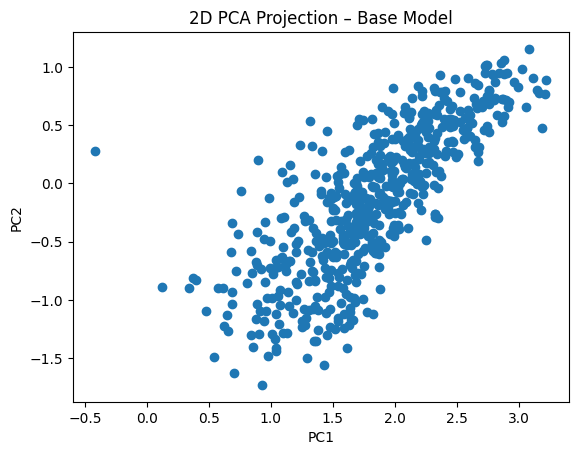

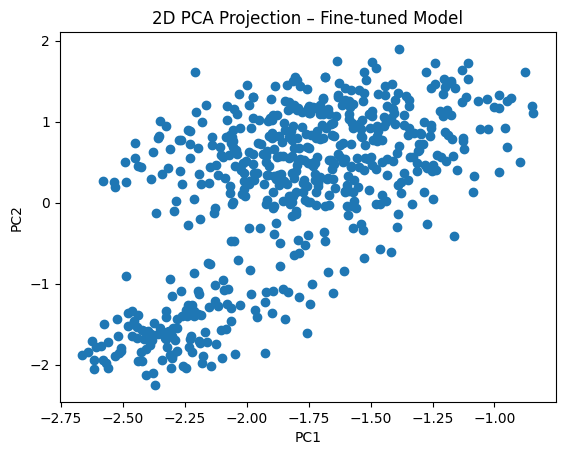

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

df = pd.read_csv('../data/categories.csv', names=['Category'])
categories = df['Category'].tolist()

model_base = SentenceTransformer("microsoft/mpnet-base")
model_ft   = SentenceTransformer("yuriivoievidka/microsoft_mpnet-base-librarian")

emb_base = model_base.encode(categories, batch_size=16, show_progress_bar=True)
emb_ft   = model_ft.encode(categories,   batch_size=16, show_progress_bar=True)

combined = np.vstack([emb_base, emb_ft])
pca = PCA(n_components=2).fit(combined)

proj_base = pca.transform(emb_base)
proj_ft   = pca.transform(emb_ft)

plt.figure()
plt.scatter(proj_base[:, 0], proj_base[:, 1])

plt.title("2D PCA Projection – Base Model")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure()
plt.scatter(proj_ft[:, 0], proj_ft[:, 1])

plt.title("2D PCA Projection – Fine‑tuned Model")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
